In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import cv2

In [2]:
images = utils.get_data()

In [3]:
autoencoder,encoder = utils.dense_autoencoder()

In [4]:
autoencoder.load_weights("weights/dense_autoencoder")

In [5]:
encoder.load_weights("weights/dense_encoder")

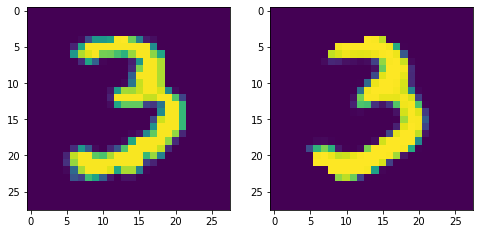

In [6]:
i = 9
img = images[i:i+1]

fig,axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(img.reshape(28,28))
axes[1].imshow(autoencoder.predict(img).reshape(28,28))

In [7]:
encodings = encoder.predict(images,batch_size=100)

### Clustering

In [8]:
from sklearn.cluster import KMeans
from pickle import dump,load

In [9]:
kmeans = KMeans(n_clusters=10)

In [10]:
kmeans.fit(encodings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
clusters = kmeans.predict(encodings)

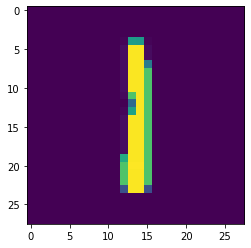

In [16]:
i = 2

img = images[i:i+1]

plt.imshow(img.reshape(28,28))

In [17]:
encoding = kmeans.predict(encoder(img))

In [18]:
similer = images[encoding == clusters]

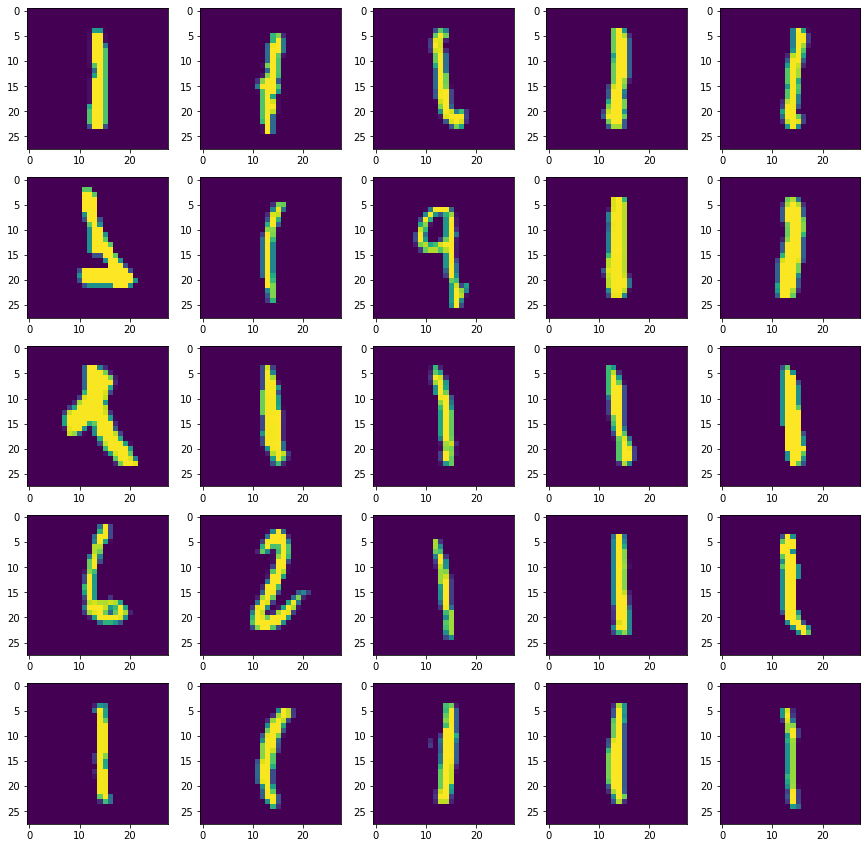

In [19]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)

In [20]:
dump(kmeans,open("./weights/cluster_objects/kmeans_dense_cluster.pickle","wb"))

In [21]:
encodings

array([[0.       , 0.       , 1.1721475, ..., 0.8730651, 2.0695775,
        1.5457757],
       [0.       , 0.       , 4.4168177, ..., 1.9104487, 1.7894282,
        2.529593 ],
       [0.       , 0.       , 1.9170518, ..., 0.7401558, 0.6140203,
        1.3825777],
       ...,
       [0.       , 0.       , 3.102374 , ..., 1.4020324, 1.8399968,
        2.2695785],
       [0.       , 0.       , 4.119713 , ..., 1.7936393, 1.3997135,
        0.7731854],
       [0.       , 0.       , 3.8526611, ..., 1.8229059, 1.531125 ,
        1.8492498]], dtype=float32)

In [22]:
np.save("./weights/encodings/dense_autoencoder.npy",encodings)

### Testing Dumped Object

In [23]:
kmeans = load(open("./weights/cluster_objects/kmeans_dense_cluster.pickle","rb"))

In [39]:
encodings = np.load("./weights/encodings/dense_autoencoder.npy")

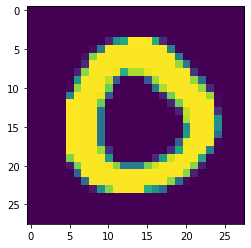

In [40]:
i = 4
img = images[i:i+1]
plt.imshow(img.reshape(28,28))

In [41]:
encoding = kmeans.predict(encoder(img))

In [42]:
clusters = kmeans.predict(encodings)

In [43]:
similer = images[encoding == clusters]

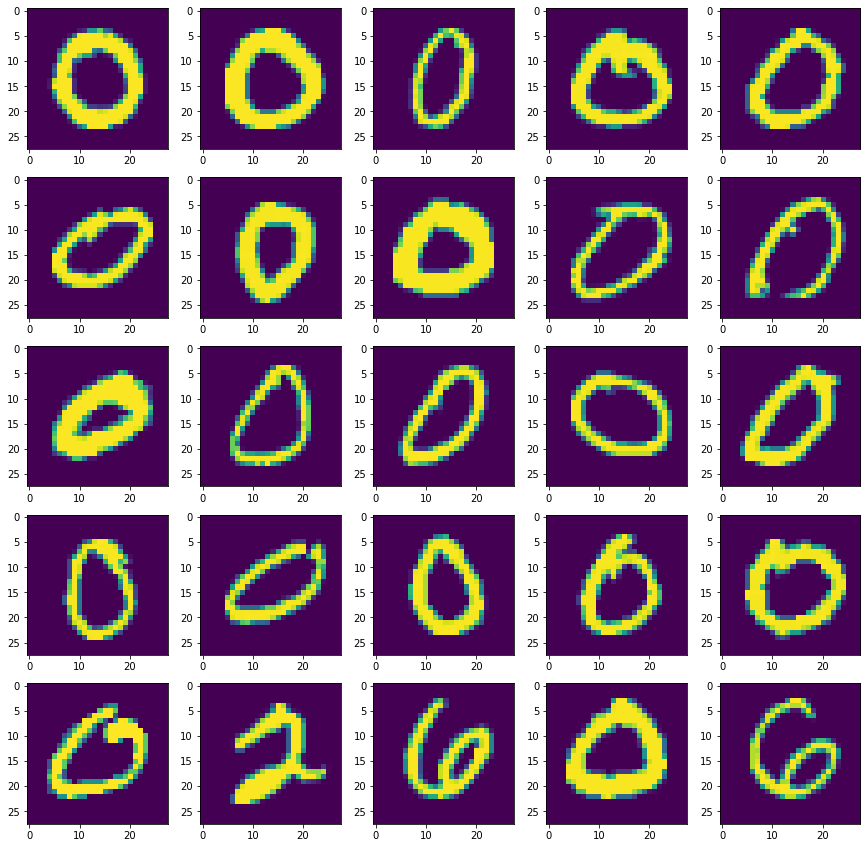

In [44]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)

In [45]:
!code .